In [1]:
# Dependencies
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from random import uniform
from api_keys import weather_api_key
from citipy import citipy
#Output File (CSV)
output_data_file = "output_data/cities.csv"
#Range of Latitude and Longitude
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [2]:
# Generate unique list of cities
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1600)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1600)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)                          

640

In [3]:
city_list = pd.DataFrame(cities)
city_list.head()

,0
0,khatanga
1,ilulissat
2,punta arenas
3,east london
4,quatre cocos


Perform API Calls

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "Imperial"

query_url = f"{url}appid={weather_api_key}&units={units}"

In [5]:
all_city_data = []
for city in cities:
    city_url = query_url + "&q=" + city
    try:
        city_weather = requests.get(city_url).json()
        print(json.dumps(city_weather, indent=4, sort_keys=True))
        print(city_url)
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_temperature = city_weather["main"]["temp_max"]
        city_humid = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        all_city_data.append({"City": city,
                             "Latitude": city_lat,
                             "Longitude": city_lon,
                             "Temperature": city_temperature,
                             "Humidity": city_humid,
                             "Clouds": city_clouds,
                             "Winds": city_wind,
                             "Country": city_country,
                             "Date": city_date})
    except:
        print("City not found")
        pass

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 71.97,
        "lon": 102.5
    },
    "dt": 1601519973,
    "id": 2022572,
    "main": {
        "feels_like": 18.64,
        "grnd_level": 1013,
        "humidity": 98,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 28.54,
        "temp_max": 28.54,
        "temp_min": 28.54
    },
    "name": "Khatanga",
    "sys": {
        "country": "RU",
        "sunrise": 1601508534,
        "sunset": 1601548213
    },
    "timezone": 25200,
    "visibility": 264,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 10.29
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=khatanga
{
    "base": "stations",
    "clouds": {
        "all": 0

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -54.8,
        "lon": -68.3
    },
    "dt": 1601519977,
    "id": 3833367,
    "main": {
        "feels_like": 10.4,
        "humidity": 86,
        "pressure": 1001,
        "temp": 30.2,
        "temp_max": 30.2,
        "temp_min": 30.2
    },
    "name": "Ushuaia",
    "sys": {
        "country": "AR",
        "id": 8303,
        "sunrise": 1601459990,
        "sunset": 1601505963,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 8000,
    "weather": [
        {
            "description": "heavy snow",
            "icon": "13n",
            "id": 602,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 230,
        "gust": 53.02,
        "speed": 27.51
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=ushuaia
{
    "base": "stations",
    "clouds": {
        "all": 17
   

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=busselton
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 22.29,
        "lon": 114.16
    },
    "dt": 1601519805,
    "id": 1819729,
    "main": {
        "feels_like": 89.78,
        "humidity": 73,
        "pressure": 1010,
        "temp": 81.99,
        "temp_max": 84,
        "temp_min": 81
    },
    "name": "Hong Kong",
    "sys": {
        "country": "HK",
        "id": 2035800,
        "sunrise": 1601504079,
        "sunset": 1601547073,
        "type": 3
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 52,
        "gust": 8.01,
        "speed": 1.99
    }
}
http://api.openweathermap.org/data/2.5/weather?appi

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -33.59,
        "lon": 26.89
    },
    "dt": 1601519984,
    "id": 964432,
    "main": {
        "feels_like": 53.47,
        "grnd_level": 1014,
        "humidity": 73,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 60.08,
        "temp_max": 60.08,
        "temp_min": 60.08
    },
    "name": "Port Alfred",
    "sys": {
        "country": "ZA",
        "sunrise": 1601524144,
        "sunset": 1601568888
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 202,
        "speed": 12.55
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=port alfred
{
    "base": "stations",
    "clouds": {
        "all

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -8.14,
        "lon": 159.59
    },
    "dt": 1601519987,
    "id": 2109528,
    "main": {
        "feels_like": 83.73,
        "grnd_level": 1007,
        "humidity": 87,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 78.8,
        "temp_max": 78.8,
        "temp_min": 78.8
    },
    "name": "Buala",
    "rain": {
        "1h": 1.64
    },
    "sys": {
        "country": "SB",
        "sunrise": 1601492764,
        "sunset": 1601536587
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 45,
        "speed": 9.22
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=buala
{
    "base": "stations",
    

{
    "base": "stations",
    "clouds": {
        "all": 61
    },
    "cod": 200,
    "coord": {
        "lat": 70.37,
        "lon": 31.11
    },
    "dt": 1601519990,
    "id": 777019,
    "main": {
        "feels_like": 39.78,
        "grnd_level": 1017,
        "humidity": 90,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 49.26,
        "temp_max": 49.26,
        "temp_min": 49.26
    },
    "name": "Vard\u00f8",
    "sys": {
        "country": "NO",
        "sunrise": 1601525556,
        "sunset": 1601565451
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 225,
        "speed": 15.37
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=vardo
{
    "base": "stations",
    "clouds": {
        "all": 40
  

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 35.24,
        "lon": 129.21
    },
    "dt": 1601519996,
    "id": 1842966,
    "main": {
        "feels_like": 73.02,
        "humidity": 47,
        "pressure": 1014,
        "temp": 75.2,
        "temp_max": 75.2,
        "temp_min": 75.2
    },
    "name": "Gijang",
    "sys": {
        "country": "KR",
        "id": 8086,
        "sunrise": 1601500668,
        "sunset": 1601543262,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 5.82
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=kijang
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 6.12,
        "lon": 81.12
    },
    "dt": 1601519998,
    "id": 1244926,
    "main": {
        "feels_like": 91.62,
        "humidity": 88,
        "pressure": 1009,
        "temp": 82.4,
        "temp_max": 82.4,
        "temp_min": 82.4
    },
    "name": "Hambantota",
    "sys": {
        "country": "LK",
        "id": 9124,
        "sunrise": 1601511788,
        "sunset": 1601555220,
        "type": 1
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 5.82
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=hambantota
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 47.65,
        "lon": 53.35
    },
    "dt": 1601520002,
    "id": 608872,
    "main": {
        "feels_like": 47.7,
        "grnd_level": 1029,
        "humidity": 59,
        "pressure": 1027,
        "sea_level": 1027,
        "temp": 55.51,
        "temp_max": 55.51,
        "temp_min": 55.51
    },
    "name": "Makat",
    "sys": {
        "country": "KZ",
        "sunrise": 1601519142,
        "sunset": 1601561192
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 67,
        "speed": 10.42
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=makat
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "c

{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": -43.3,
        "lon": -65.1
    },
    "dt": 1601519752,
    "id": 3839307,
    "main": {
        "feels_like": 33.12,
        "grnd_level": 1004,
        "humidity": 44,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 51.78,
        "temp_max": 51.78,
        "temp_min": 51.78
    },
    "name": "Rawson",
    "sys": {
        "country": "AR",
        "sunrise": 1601459644,
        "sunset": 1601504773
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 257,
        "speed": 26.44
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=rawson
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": -45.42,
        "lon": 167.72
    },
    "dt": 1601520012,
    "id": 2181625,
    "main": {
        "feels_like": 44.11,
        "grnd_level": 996,
        "humidity": 73,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 49.5,
        "temp_max": 49.5,
        "temp_min": 49.5
    },
    "name": "Te Anau",
    "sys": {
        "country": "NZ",
        "sunrise": 1601490064,
        "sunset": 1601535386
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 325,
        "speed": 6.04
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=te anau
{
    "base": "stations",
    "clouds": {
        "all": 49
  

{
    "base": "stations",
    "clouds": {
        "all": 71
    },
    "cod": 200,
    "coord": {
        "lat": 16.52,
        "lon": -98.75
    },
    "dt": 1601520018,
    "id": 3516171,
    "main": {
        "feels_like": 86.59,
        "grnd_level": 1014,
        "humidity": 80,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 80.74,
        "temp_max": 80.74,
        "temp_min": 80.74
    },
    "name": "Barra de Tecoanapa",
    "sys": {
        "country": "MX",
        "sunrise": 1601468694,
        "sunset": 1601511871
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 6.96
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=tecoanapa
{
    "base": "stations",
    "clouds": {
     

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 68.5,
        "lon": 14.83
    },
    "dt": 1601520021,
    "id": 3146160,
    "main": {
        "feels_like": 47.66,
        "humidity": 92,
        "pressure": 1014,
        "temp": 50,
        "temp_max": 50,
        "temp_min": 50
    },
    "name": "Melbu",
    "sys": {
        "country": "NO",
        "id": 2006543,
        "sunrise": 1601529309,
        "sunset": 1601569510,
        "type": 3
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 106,
        "speed": 3.27
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=melbu
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 29.6,
        "lon": -90.72
    },
    "dt": 1601519799,
    "id": 4328010,
    "main": {
        "feels_like": 65.03,
        "humidity": 77,
        "pressure": 1019,
        "temp": 65.08,
        "temp_max": 66,
        "temp_min": 64.4
    },
    "name": "Houma",
    "sys": {
        "country": "US",
        "id": 4444,
        "sunrise": 1601466946,
        "sunset": 1601509766,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 4.43
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=houma
{
    "base": "stations",
    "clouds": {
        "all": 24
    },
    "cod": 200,
    "coo

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=vaitupu
City not found
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -13.88,
        "lon": 167.55
    },
    "dt": 1601520029,
    "id": 2134814,
    "main": {
        "feels_like": 79.48,
        "grnd_level": 1003,
        "humidity": 83,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 79.66,
        "temp_max": 79.66,
        "temp_min": 79.66
    },
    "name": "Sola",
    "rain": {
        "1h": 0.51
    },
    "sys": {
        "country": "VU",
        "sunrise": 1601490771,
        "sunset": 1601534760
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 107,
        "speed": 17.72
    }
}
http://ap

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=clyde river
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -25.21,
        "lon": -50.98
    },
    "dt": 1601520032,
    "id": 3452216,
    "main": {
        "feels_like": 68.54,
        "grnd_level": 927,
        "humidity": 89,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 66.38,
        "temp_max": 66.38,
        "temp_min": 66.38
    },
    "name": "Prudent\u00f3polis",
    "sys": {
        "country": "BR",
        "sunrise": 1601456657,
        "sunset": 1601500984
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 162,
        "speed": 4.07
    }
}
http://api.openweathermap.org/data/2.5/weather?ap

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -25.24,
        "lon": 130.99
    },
    "dt": 1601520036,
    "id": 6355222,
    "main": {
        "feels_like": 78.75,
        "humidity": 17,
        "pressure": 1018,
        "temp": 89.6,
        "temp_max": 89.6,
        "temp_min": 89.6
    },
    "name": "Yulara",
    "sys": {
        "country": "AU",
        "id": 9487,
        "sunrise": 1601499352,
        "sunset": 1601543724,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 14.99
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=yulara
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 64.75,
        "lon": 177.48
    },
    "dt": 1601520040,
    "id": 2127202,
    "main": {
        "feels_like": 30.34,
        "humidity": 93,
        "pressure": 1008,
        "temp": 37.18,
        "temp_max": 37.4,
        "temp_min": 37
    },
    "name": "Anadyr",
    "sys": {
        "country": "RU",
        "id": 8872,
        "sunrise": 1601489932,
        "sunset": 1601530834,
        "type": 1
    },
    "timezone": 43200,
    "visibility": 5000,
    "weather": [
        {
            "description": "mist",
            "icon": "50d",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 6.71
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=anadyr
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 39.27,
        "lon": 141.88
    },
    "dt": 1601520045,
    "id": 2112444,
    "main": {
        "feels_like": 60.73,
        "humidity": 72,
        "pressure": 1011,
        "temp": 60.8,
        "temp_max": 60.8,
        "temp_min": 60.8
    },
    "name": "Kamaishi",
    "sys": {
        "country": "JP",
        "id": 8047,
        "sunrise": 1601497698,
        "sunset": 1601540152,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.12
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=kamaishi
{
    "cod": "404",
    "message": "city not found"
}
http://api.openweathermap.

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=guaraciaba do norte
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 55.1,
        "lon": -105.28
    },
    "dt": 1601520049,
    "id": 6050066,
    "main": {
        "feels_like": 35.56,
        "humidity": 81,
        "pressure": 1029,
        "temp": 42.8,
        "temp_max": 42.8,
        "temp_min": 42.8
    },
    "name": "La Ronge",
    "sys": {
        "country": "CA",
        "id": 949,
        "sunrise": 1601470965,
        "sunset": 1601512735,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light intensity shower rain",
            "icon": "09n",
            "id": 520,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 8.05
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 35.13,
        "lon": 140.3
    },
    "dt": 1601520053,
    "id": 2112309,
    "main": {
        "feels_like": 69.53,
        "humidity": 82,
        "pressure": 1010,
        "temp": 68.47,
        "temp_max": 69.01,
        "temp_min": 68
    },
    "name": "Katsuura",
    "rain": {
        "1h": 0.42
    },
    "sys": {
        "country": "JP",
        "id": 8074,
        "sunrise": 1601498003,
        "sunset": 1601540605,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "shower rain",
            "icon": "09d",
            "id": 521,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 40,
        "speed": 5.82
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=katsuura
{
    "cod": "404",
    "message": "city not

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -25.73,
        "lon": -53.06
    },
    "dt": 1601520058,
    "id": 3464579,
    "main": {
        "feels_like": 73.15,
        "grnd_level": 946,
        "humidity": 70,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 71.29,
        "temp_max": 71.29,
        "temp_min": 71.29
    },
    "name": "Dois Vizinhos",
    "rain": {
        "1h": 0.13
    },
    "sys": {
        "country": "BR",
        "sunrise": 1601457147,
        "sunset": 1601501492
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 99,
        "speed": 3.2
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=dois vizinhos
{
    "base": "s

}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=marshfield
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.7,
        "lon": -53.46
    },
    "dt": 1601520062,
    "id": 3443061,
    "main": {
        "feels_like": 60.06,
        "grnd_level": 1005,
        "humidity": 93,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 60.87,
        "temp_max": 60.87,
        "temp_min": 60.87
    },
    "name": "Chui",
    "sys": {
        "country": "UY",
        "sunrise": 1601457090,
        "sunset": 1601501742
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 354,
        "speed": 6.49
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -17.73,
        "lon": -149.15
    },
    "dt": 1601520065,
    "id": 4033557,
    "main": {
        "feels_like": 87.17,
        "humidity": 62,
        "pressure": 1015,
        "temp": 84.2,
        "temp_max": 84.2,
        "temp_min": 84.2
    },
    "name": "Tautira",
    "sys": {
        "country": "PF",
        "id": 7318,
        "sunrise": 1601480325,
        "sunset": 1601524426,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 8.05
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=tautira
{
    "base": "stations",
    "clouds": {
        "all": 77
    },
    "cod": 20

{
    "base": "stations",
    "clouds": {
        "all": 33
    },
    "cod": 200,
    "coord": {
        "lat": 16.45,
        "lon": -85.85
    },
    "dt": 1601520069,
    "id": 3601402,
    "main": {
        "feels_like": 91.38,
        "grnd_level": 1012,
        "humidity": 68,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 85.23,
        "temp_max": 85.23,
        "temp_min": 85.23
    },
    "name": "Savannah Bight",
    "sys": {
        "country": "HN",
        "sunrise": 1601465597,
        "sunset": 1601508778
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 44,
        "speed": 5.86
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=savannah bight
{
    "base": "stations",
    "clouds": {
  

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -20.41,
        "lon": 57.7
    },
    "dt": 1601520074,
    "id": 934322,
    "main": {
        "feels_like": 65.3,
        "humidity": 93,
        "pressure": 1017,
        "temp": 64.4,
        "temp_max": 64.4,
        "temp_min": 64.4
    },
    "name": "Mah\u00e9bourg",
    "sys": {
        "country": "MU",
        "id": 2061,
        "sunrise": 1601517015,
        "sunset": 1601561231,
        "type": 1
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 5.82
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=mahebourg
{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": 28.96,
        "lon": -13.55
    },
    "dt": 1601520079,
    "id": 2521570,
    "main": {
        "feels_like": 71.29,
        "humidity": 73,
        "pressure": 1018,
        "temp": 71.6,
        "temp_max": 71.6,
        "temp_min": 71.6
    },
    "name": "Arrecife",
    "sys": {
        "country": "ES",
        "id": 2371,
        "sunrise": 1601534840,
        "sunset": 1601577598,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 8.05
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=arrecife
{
    "base": "stations",
    "clouds": {
        "all": 32
    },
    "cod":

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 43.48,
        "lon": -8.24
    },
    "dt": 1601520082,
    "id": 3123493,
    "main": {
        "feels_like": 53.71,
        "humidity": 87,
        "pressure": 1014,
        "temp": 57.69,
        "temp_max": 59,
        "temp_min": 55
    },
    "name": "Ferrol",
    "sys": {
        "country": "ES",
        "id": 6403,
        "sunrise": 1601533839,
        "sunset": 1601576052,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 9.17
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=ferrol
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coo

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 3.78,
        "lon": 72.97
    },
    "dt": 1601520086,
    "id": 1337605,
    "main": {
        "feels_like": 86,
        "grnd_level": 1011,
        "humidity": 78,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 81.64,
        "temp_max": 81.64,
        "temp_min": 81.64
    },
    "name": "Mahibadhoo",
    "sys": {
        "country": "MV",
        "sunrise": 1601513712,
        "sunset": 1601557207
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 317,
        "speed": 9.73
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=mahibadhoo
{
    "base": "stations",
    "clouds": {
        "all": 

{
    "base": "stations",
    "clouds": {
        "all": 47
    },
    "cod": 200,
    "coord": {
        "lat": 18.38,
        "lon": 122.13
    },
    "dt": 1601520089,
    "id": 1718214,
    "main": {
        "feels_like": 88.47,
        "grnd_level": 1007,
        "humidity": 82,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 82.78,
        "temp_max": 82.78,
        "temp_min": 82.78
    },
    "name": "Casambalangan",
    "rain": {
        "1h": 1.0298
    },
    "sys": {
        "country": "PH",
        "sunrise": 1601502111,
        "sunset": 1601545216
    },
    "timezone": 28800,
    "visibility": 5566,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 58,
        "speed": 10.09
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=casambalangan
{
    "bas

{
    "base": "stations",
    "clouds": {
        "all": 21
    },
    "cod": 200,
    "coord": {
        "lat": -3.54,
        "lon": 118.97
    },
    "dt": 1601520092,
    "id": 1636806,
    "main": {
        "feels_like": 88.61,
        "grnd_level": 1009,
        "humidity": 64,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 85.98,
        "temp_max": 85.98,
        "temp_min": 85.98
    },
    "name": "Majene",
    "sys": {
        "country": "ID",
        "sunrise": 1601502574,
        "sunset": 1601546270
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 111,
        "speed": 11.07
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=majene
{
    "base": "stations",
    "clouds": {
        "all": 40
    }

{
    "cod": "404",
    "message": "city not found"
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=mutsamudu
City not found
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 41.37,
        "lon": -73.41
    },
    "dt": 1601520096,
    "id": 5282297,
    "main": {
        "feels_like": 50.54,
        "humidity": 59,
        "pressure": 1012,
        "temp": 56.77,
        "temp_max": 60.8,
        "temp_min": 52
    },
    "name": "Bethel",
    "sys": {
        "country": "US",
        "id": 3888,
        "sunrise": 1601462983,
        "sunset": 1601505422,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 200,
        "speed": 8.05
    }
}
http://api.openw

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 64.38,
        "lon": -173.3
    },
    "dt": 1601520099,
    "id": 4031574,
    "main": {
        "feels_like": 35.44,
        "humidity": 73,
        "pressure": 1004,
        "temp": 44.6,
        "temp_max": 44.6,
        "temp_min": 44.6
    },
    "name": "Provideniya",
    "sys": {
        "country": "RU",
        "id": 8875,
        "sunrise": 1601574269,
        "sunset": 1601614832,
        "type": 1
    },
    "timezone": 43200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 11.18
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=provideniya
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "c

{
    "base": "stations",
    "clouds": {
        "all": 80
    },
    "cod": 200,
    "coord": {
        "lat": 3.17,
        "lon": -52.32
    },
    "dt": 1601520104,
    "id": 3382226,
    "main": {
        "feels_like": 79.03,
        "grnd_level": 1003,
        "humidity": 92,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 73.35,
        "temp_max": 73.35,
        "temp_min": 73.35
    },
    "name": "Camopi",
    "sys": {
        "country": "GF",
        "sunrise": 1601457383,
        "sunset": 1601500902
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 89,
        "speed": 4.25
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=camopi
{
    "base": "stations",
    "clouds": {
        "all": 100
   

{
    "base": "stations",
    "clouds": {
        "all": 57
    },
    "cod": 200,
    "coord": {
        "lat": 1.2,
        "lon": -70.17
    },
    "dt": 1601520107,
    "id": 3674676,
    "main": {
        "feels_like": 79.16,
        "grnd_level": 990,
        "humidity": 96,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 72.18,
        "temp_max": 72.18,
        "temp_min": 72.18
    },
    "name": "Mit\u00fa",
    "sys": {
        "country": "CO",
        "sunrise": 1601461641,
        "sunset": 1601505209
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 253,
        "speed": 2.04
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=mitu
{
    "base": "stations",
    "clouds": {
        "all": 90
    

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 65.85,
        "lon": 74.49
    },
    "dt": 1601520112,
    "id": 1495626,
    "main": {
        "feels_like": 38.16,
        "grnd_level": 1016,
        "humidity": 96,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 42.46,
        "temp_max": 42.46,
        "temp_min": 42.46
    },
    "name": "Pangody",
    "sys": {
        "country": "RU",
        "sunrise": 1601514768,
        "sunset": 1601555422
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 288,
        "speed": 4.18
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=pangody
{
    "base": "stations",
    "clouds": {
        "all": 92


{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {
        "lat": 60.7,
        "lon": 10.35
    },
    "dt": 1601520115,
    "id": 3151719,
    "main": {
        "feels_like": 50.86,
        "humidity": 98,
        "pressure": 1014,
        "temp": 52,
        "temp_max": 52,
        "temp_min": 52
    },
    "name": "Hov",
    "sys": {
        "country": "NO",
        "id": 2031406,
        "sunrise": 1601529913,
        "sunset": 1601571057,
        "type": 3
    },
    "timezone": 7200,
    "visibility": 3367,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 87,
        "speed": 2.86
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=hov
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord"

http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=nantucket
{
    "cod": "404",
    "message": "city not found"
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=tabiauea
City not found
{
    "base": "stations",
    "clouds": {
        "all": 41
    },
    "cod": 200,
    "coord": {
        "lat": 20.93,
        "lon": -17.03
    },
    "dt": 1601520118,
    "id": 2377457,
    "main": {
        "feels_like": 67.06,
        "humidity": 83,
        "pressure": 1013,
        "temp": 71.6,
        "temp_max": 71.6,
        "temp_min": 71.6
    },
    "name": "Nouadhibou",
    "sys": {
        "country": "MR",
        "id": 2444,
        "sunrise": 1601535551,
        "sunset": 1601578557,
        "type": 1
    },
    "timezone": 0,
    "visibility": 8000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
      

{
    "cod": "404",
    "message": "city not found"
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=korogwe
City not found
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -34.93,
        "lon": 138.6
    },
    "dt": 1601520062,
    "id": 2078025,
    "main": {
        "feels_like": 51.82,
        "humidity": 59,
        "pressure": 1018,
        "temp": 61.56,
        "temp_max": 64.99,
        "temp_min": 59
    },
    "name": "Adelaide",
    "sys": {
        "country": "AU",
        "id": 9566,
        "sunrise": 1601497329,
        "sunset": 1601542095,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 16.11
    }
}
http://api.o

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": -12.23,
        "lon": 136.77
    },
    "dt": 1601520125,
    "id": 2064735,
    "main": {
        "feels_like": 85.35,
        "humidity": 52,
        "pressure": 1013,
        "temp": 87.8,
        "temp_max": 87.8,
        "temp_min": 87.8
    },
    "name": "Nhulunbuy",
    "sys": {
        "country": "AU",
        "id": 9576,
        "sunrise": 1601498179,
        "sunset": 1601542123,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 16.11
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=nhulunbuy
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "

{
    "cod": "404",
    "message": "city not found"
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=longlac
City not found
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 28.72,
        "lon": -111.58
    },
    "dt": 1601520129,
    "id": 3991622,
    "main": {
        "feels_like": 92.97,
        "humidity": 74,
        "pressure": 1005,
        "temp": 84.99,
        "temp_max": 87.01,
        "temp_min": 84
    },
    "name": "La Providencia",
    "sys": {
        "country": "MX",
        "id": 2011859,
        "sunrise": 1601471941,
        "sunset": 1601514781,
        "type": 3
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 225,
        "gust": 5.99,
        "spee

{
    "cod": "404",
    "message": "city not found"
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=saleaula
City not found
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.01,
        "lon": 17.94
    },
    "dt": 1601520132,
    "id": 3361934,
    "main": {
        "feels_like": 43.34,
        "humidity": 76,
        "pressure": 1014,
        "temp": 51.8,
        "temp_max": 51.8,
        "temp_min": 51.8
    },
    "name": "Saldanha",
    "sys": {
        "country": "ZA",
        "id": 1943,
        "sunrise": 1601526303,
        "sunset": 1601571024,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 12.75
    }
}
http://api.open

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 28.66,
        "lon": -17.92
    },
    "dt": 1601520138,
    "id": 2514651,
    "main": {
        "feels_like": 69.28,
        "humidity": 73,
        "pressure": 1019,
        "temp": 73.4,
        "temp_max": 73.4,
        "temp_min": 73.4
    },
    "name": "Los Llanos de Aridane",
    "sys": {
        "country": "ES",
        "id": 2377,
        "sunrise": 1601535885,
        "sunset": 1601578651,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 16.11
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=los llanos de aridane
{
    "base": "stations",
    "clouds": {
        "

{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": 51.99,
        "lon": 8.79
    },
    "dt": 1601520141,
    "id": 2881956,
    "main": {
        "feels_like": 49.55,
        "humidity": 96,
        "pressure": 1007,
        "temp": 50.7,
        "temp_max": 52,
        "temp_min": 48.99
    },
    "name": "Lage",
    "sys": {
        "country": "DE",
        "id": 265457,
        "sunrise": 1601529966,
        "sunset": 1601571752,
        "type": 3
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 117,
        "gust": 5.01,
        "speed": 1.99
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=lage
{
    "base": "stations",
    "clouds": {
        "all": 67
   

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 68.82,
        "lon": -51.19
    },
    "dt": 1601520145,
    "id": 3420768,
    "main": {
        "feels_like": 9.52,
        "humidity": 57,
        "pressure": 1014,
        "temp": 19.4,
        "temp_max": 19.4,
        "temp_min": 19.4
    },
    "name": "Qasigiannguit",
    "sys": {
        "country": "GL",
        "id": 165,
        "sunrise": 1601545221,
        "sunset": 1601585281,
        "type": 1
    },
    "timezone": -7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 6.93
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=qasigiannguit
{
    "base": "stations",
    "clouds": {
        "all": 50
    },
    "cod":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 59.38,
        "lon": 143.3
    },
    "dt": 1601520149,
    "id": 2122605,
    "main": {
        "feels_like": 47.86,
        "grnd_level": 1015,
        "humidity": 52,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 54.81,
        "temp_max": 54.81,
        "temp_min": 54.81
    },
    "name": "Okhotsk",
    "sys": {
        "country": "RU",
        "sunrise": 1601497895,
        "sunset": 1601539273
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 345,
        "speed": 7.56
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=okhotsk
{
    "base": "stations",
    "clouds": {
        "all": 63
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 40.81,
        "lon": 114.88
    },
    "dt": 1601520152,
    "id": 2033196,
    "main": {
        "feels_like": 48.34,
        "grnd_level": 925,
        "humidity": 33,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 59.94,
        "temp_max": 59.94,
        "temp_min": 59.94
    },
    "name": "Zhangjiakou",
    "sys": {
        "country": "CN",
        "sunrise": 1601504212,
        "sunset": 1601546595
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 274,
        "speed": 13.91
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=zhangjiakou
{
    "base": "stations",
    "clouds": {
        "all": 57

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 17.15,
        "lon": -25.02
    },
    "dt": 1601520155,
    "id": 3374351,
    "main": {
        "feels_like": 81.34,
        "humidity": 78,
        "pressure": 1014,
        "temp": 78.8,
        "temp_max": 78.8,
        "temp_min": 78.8
    },
    "name": "Pombas",
    "sys": {
        "country": "CV",
        "id": 2467,
        "sunrise": 1601537414,
        "sunset": 1601580529,
        "type": 1
    },
    "timezone": -3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 10.29
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=pombas
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 2

{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 59.62,
        "lon": 52.47
    },
    "dt": 1601520158,
    "id": 500695,
    "main": {
        "feels_like": 40.73,
        "grnd_level": 1010,
        "humidity": 95,
        "pressure": 1033,
        "sea_level": 1033,
        "temp": 44.29,
        "temp_max": 44.29,
        "temp_min": 44.29
    },
    "name": "Rudnichnyy",
    "sys": {
        "country": "RU",
        "sunrise": 1601519739,
        "sunset": 1601561017
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 196,
        "speed": 3.44
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=rudnichnyy
{
    "base": "stations",
    "clouds": {
        "all"

{
    "cod": "404",
    "message": "city not found"
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=ondorhaan
City not found
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 31.61,
        "lon": 34.76
    },
    "dt": 1601520162,
    "id": 293842,
    "main": {
        "feels_like": 75.99,
        "humidity": 63,
        "pressure": 1006,
        "temp": 73.31,
        "temp_max": 75,
        "temp_min": 70
    },
    "name": "Kiryat Gat",
    "sys": {
        "country": "IL",
        "id": 2004982,
        "sunrise": 1601523285,
        "sunset": 1601565970,
        "type": 3
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 36,
        "gust": 3,
        "speed": 1.01
    

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 64.96,
        "lon": 34.58
    },
    "dt": 1601520167,
    "id": 551145,
    "main": {
        "feels_like": 45.18,
        "grnd_level": 1022,
        "humidity": 82,
        "pressure": 1024,
        "sea_level": 1024,
        "temp": 49.3,
        "temp_max": 49.3,
        "temp_min": 49.3
    },
    "name": "Kem'",
    "sys": {
        "country": "RU",
        "sunrise": 1601524311,
        "sunset": 1601565031
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 236,
        "speed": 4.85
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=kem
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 7.11,
        "lon": 5.12
    },
    "dt": 1601520170,
    "id": 2339150,
    "main": {
        "feels_like": 74.97,
        "grnd_level": 974,
        "humidity": 100,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 68.88,
        "temp_max": 68.88,
        "temp_min": 68.88
    },
    "name": "Idanre",
    "sys": {
        "country": "NG",
        "sunrise": 1601530039,
        "sunset": 1601573440
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 277,
        "speed": 1.77
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=idanre
{
    "base": "stations",
    "clouds": {
        "all": 0
    }

{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": -25.4,
        "lon": -70.48
    },
    "dt": 1601520174,
    "id": 3870243,
    "main": {
        "feels_like": 55.22,
        "grnd_level": 1014,
        "humidity": 64,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 58.17,
        "temp_max": 58.17,
        "temp_min": 58.17
    },
    "name": "Taltal",
    "sys": {
        "country": "CL",
        "sunrise": 1601461330,
        "sunset": 1601505669
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 211,
        "speed": 3.62
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=taltal
{
    "base": "stations",
    "clouds": {
        "all": 79
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 51.26,
        "lon": -80.61
    },
    "dt": 1601520177,
    "id": 6078372,
    "main": {
        "feels_like": 34.18,
        "humidity": 100,
        "pressure": 1000,
        "temp": 39.2,
        "temp_max": 39.2,
        "temp_min": 39.2
    },
    "name": "Moose Factory",
    "sys": {
        "country": "CA",
        "id": 860,
        "sunrise": 1601464928,
        "sunset": 1601506932,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 4.7
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=moose factory
{
    "base": "stations",
    "clouds": {
        "all": 100
    }

{
    "base": "stations",
    "clouds": {
        "all": 52
    },
    "cod": 200,
    "coord": {
        "lat": -3.67,
        "lon": 152.43
    },
    "dt": 1601520180,
    "id": 2090021,
    "main": {
        "feels_like": 92.35,
        "grnd_level": 1000,
        "humidity": 72,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 84.76,
        "temp_max": 84.76,
        "temp_min": 84.76
    },
    "name": "Namatanai",
    "rain": {
        "1h": 0.77
    },
    "sys": {
        "country": "PG",
        "sunrise": 1601494544,
        "sunset": 1601538243
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 4.59
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=namatanai
{
    "cod": "404",
  

{
    "base": "stations",
    "clouds": {
        "all": 26
    },
    "cod": 200,
    "coord": {
        "lat": -7.53,
        "lon": -46.04
    },
    "dt": 1601520184,
    "id": 3406545,
    "main": {
        "feels_like": 79.84,
        "grnd_level": 980,
        "humidity": 38,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 80.28,
        "temp_max": 80.28,
        "temp_min": 80.28
    },
    "name": "Balsas",
    "sys": {
        "country": "BR",
        "sunrise": 1601455738,
        "sunset": 1601499533
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 189,
        "speed": 2.08
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=balsas
{
    "base": "stations",
    "clouds": {
        "all": 85


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -18.65,
        "lon": -173.98
    },
    "dt": 1601520187,
    "id": 4032420,
    "main": {
        "feels_like": 86.81,
        "humidity": 88,
        "pressure": 1013,
        "temp": 80.6,
        "temp_max": 80.6,
        "temp_min": 80.6
    },
    "name": "Neiafu",
    "sys": {
        "country": "TO",
        "id": 7292,
        "sunrise": 1601572615,
        "sunset": 1601616812,
        "type": 1
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 9.17
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=neiafu
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 39.64,
        "lon": 141.95
    },
    "dt": 1601520189,
    "id": 2111884,
    "main": {
        "feels_like": 63.59,
        "grnd_level": 1012,
        "humidity": 66,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 64.6,
        "temp_max": 64.6,
        "temp_min": 64.6
    },
    "name": "Miyako",
    "sys": {
        "country": "JP",
        "sunrise": 1601497688,
        "sunset": 1601540128
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 121,
        "speed": 3.42
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=miyako
{
    "base": "stations",
    "clouds": {
        "all": 92
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 61.28,
        "lon": 108.01
    },
    "dt": 1601520192,
    "id": 2012956,
    "main": {
        "feels_like": 24.44,
        "grnd_level": 989,
        "humidity": 88,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 32.34,
        "temp_max": 32.34,
        "temp_min": 32.34
    },
    "name": "Yerbogach\u00ebn",
    "sys": {
        "country": "RU",
        "sunrise": 1601506461,
        "sunset": 1601547643
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 223,
        "speed": 6.98
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=yerbogachen
{
    "cod": "404",
    "message": "city not f

{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": 42.56,
        "lon": -2.36
    },
    "dt": 1601520196,
    "id": 3129839,
    "main": {
        "feels_like": 50.29,
        "humidity": 87,
        "pressure": 1011,
        "temp": 53.01,
        "temp_max": 55.99,
        "temp_min": 50
    },
    "name": "Aras",
    "sys": {
        "country": "ES",
        "id": 6418,
        "sunrise": 1601532406,
        "sunset": 1601574663,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 319,
        "speed": 4.61
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=aras
{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
  

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 14.76,
        "lon": -90.99
    },
    "dt": 1601520200,
    "id": 3588476,
    "main": {
        "feels_like": 52.41,
        "humidity": 93,
        "pressure": 1024,
        "temp": 58.26,
        "temp_max": 64.4,
        "temp_min": 51.01
    },
    "name": "Tecpan",
    "sys": {
        "country": "GT",
        "id": 7079,
        "sunrise": 1601466809,
        "sunset": 1601510033,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 13.87
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=tecpan
{
    "base": "stations",
    "clouds": {
        "all": 60
    },
    "cod": 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 34.04,
        "lon": -5
    },
    "dt": 1601520203,
    "id": 2548885,
    "main": {
        "feels_like": 63.36,
        "humidity": 72,
        "pressure": 1018,
        "temp": 64.4,
        "temp_max": 64.4,
        "temp_min": 64.4
    },
    "name": "Fes",
    "sys": {
        "country": "MA",
        "id": 2390,
        "sunrise": 1601532874,
        "sunset": 1601575462,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 4.7
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=fez
{
    "base": "stations",
    "clouds": {
        "all": 10
    },
    "cod": 200,
    "coord": {
  

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -9.02,
        "lon": -42.7
    },
    "dt": 1601520206,
    "id": 3388145,
    "main": {
        "feels_like": 72.37,
        "grnd_level": 972,
        "humidity": 39,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 75.47,
        "temp_max": 75.47,
        "temp_min": 75.47
    },
    "name": "S\u00e3o Raimundo Nonato",
    "sys": {
        "country": "BR",
        "sunrise": 1601454917,
        "sunset": 1601498751
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 106,
        "speed": 5.06
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=sao raimundo nonato
{
    "base": "stations",
    "clouds":

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 21.44,
        "lon": -157.84
    },
    "dt": 1601520209,
    "id": 5856516,
    "main": {
        "feels_like": 85.24,
        "humidity": 65,
        "pressure": 1011,
        "temp": 82.85,
        "temp_max": 84.2,
        "temp_min": 82
    },
    "name": "\u2018\u0100huimanu",
    "sys": {
        "country": "US",
        "id": 7877,
        "sunrise": 1601482943,
        "sunset": 1601525979,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 9.17
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=ahuimanu
{
    "cod": "404",
    "message": "city not found"
}
http://api.openw

{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": -3.28,
        "lon": -39.27
    },
    "dt": 1601520213,
    "id": 3386177,
    "main": {
        "feels_like": 78.58,
        "grnd_level": 1011,
        "humidity": 76,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 78.84,
        "temp_max": 78.84,
        "temp_min": 78.84
    },
    "name": "Trairi",
    "sys": {
        "country": "BR",
        "sunrise": 1601454169,
        "sunset": 1601497852
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 14.56
    }
}
http://api.openweathermap.org/data/2.5/weather?appid=a49a129424c060972dd3e8502d0d8dd1&units=Imperial&q=trairi
{
    "base": "stations",
    "clouds": {
        "all": 9

Convert Raw Data to DataFrame

In [6]:
city_data_df = pd.DataFrame(all_city_data)
city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Clouds,Winds,Country,Date
0,khatanga,71.97,102.50,28.54,98,100,10.29,RU,1601519973
1,ilulissat,69.22,-51.10,19.40,57,0,6.93,GL,1601519974
2,punta arenas,-53.15,-70.92,32.00,90,20,18.34,CL,1601519974
3,east london,-33.02,27.91,62.17,79,80,18.70,ZA,1601519975
4,quatre cocos,-20.21,57.76,70.00,93,40,5.82,MU,1601519975


In [7]:
#save to csv
city_data_df.to_csv("city_data.csv")

Inspect the data and remove the cities where the humidity > 100%

In inspecting the data I did not have any city witth a humidity greater than 100%. 

Plotting the Data

Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

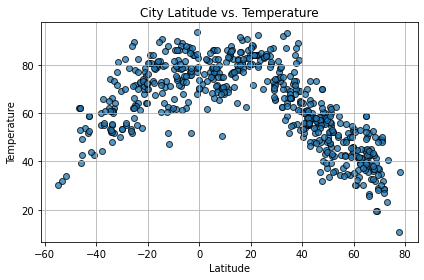

In [8]:
plt.scatter(city_data_df["Latitude"], city_data_df["Temperature"], alpha = .75, edgecolors = "k")
plt.title(f"City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.savefig("temp.png")
plt.show

In this plot graph we are seeing the main effects latitude has on temperature.  In seeing the curve of this graph we are shown the direct results being at the equator has on temperature.  As one gets farther away from the equator on either side our graph curves down to lower temperatures.

Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

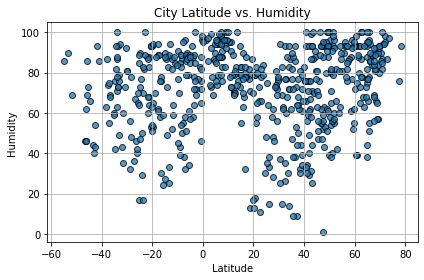

In [9]:
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], alpha = .75, edgecolors = "k")
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.tight_layout()
plt.savefig("humid.png")
plt.show

In this plot graph we can see that latitude has less of an effect on humidity then temperature.  In this case we do see a drop in humidity a little closer to the equator.  In general you see high humidity within the latitiude perameters we have in this datat set.

Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

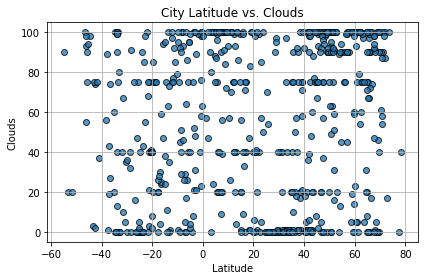

In [10]:
plt.scatter(city_data_df["Latitude"], city_data_df["Clouds"], alpha = .75, edgecolors = "k")
plt.title(f"City Latitude vs. Clouds")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.grid(True)
plt.tight_layout()
plt.savefig("cloud.png")
plt.show

In this plot we see that within the latitidues we are looking at there is either no clouds our a lot of cloud coverage.  We do have some cities that do sit within the middle but majority are either no clouds or heavy clouds.  

Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

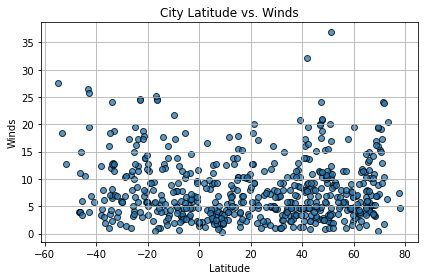

In [11]:
plt.scatter(city_data_df["Latitude"], city_data_df["Winds"], alpha = .75, edgecolors = "k")
plt.title(f"City Latitude vs. Winds")
plt.xlabel("Latitude")
plt.ylabel("Winds")
plt.grid(True)
plt.tight_layout()
plt.savefig("winds.png")
plt.show

In this plot we are seeing that at the latitidues we are looking at the cities have very low winds.  We do have a few outliers at higher wind speeds, but this is not predicted by latitiude. 

Linear Regression

In [12]:
# Setting up linear regression
northern = city_data_df.loc[city_data_df["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = city_data_df.loc[city_data_df["Latitude"] < 0.0]

In [17]:
# Setting up linear regression part II
def plotLinearRegression(xdata, ydata, xlbl, ylbl, lblpos, ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y + " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.8436983300703277


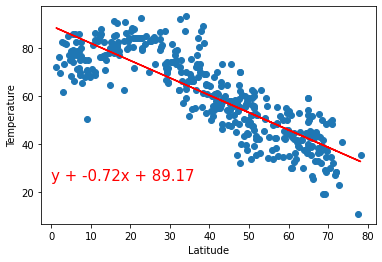

In [22]:
xlbl = "Latitude"
ylbl = "Temperature"
lblpos = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,5)

In this linear regression we see a negative correlation in temperatures dropping as we get farther away in Latitiude from equater going towards the Northern hemisphere.

Southern Hemisphere - Max Temp vs Latitude Linear Regression

The r-squared is 0.6756910349740328


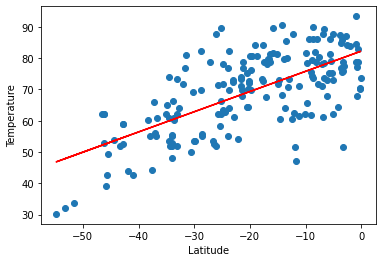

In [23]:
xlbl = "Latitude"
ylbl = "Temperature"
lblpos = (-60,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

In this linear regression we see a positive correlation in temperatures and the Latidue getting closer to the equater going away from the Southern hemisphere.

Northern Hemisphere - Humiditu(%) vs. Latitude Linear Regression

The r-squared is 0.0445701875057864


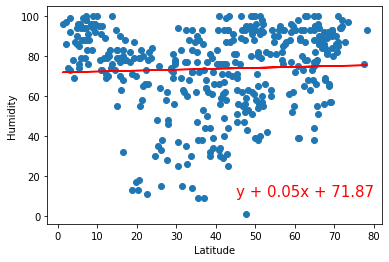

In [24]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)

For the Northern Hemisphere linear regression we see a close to flat line. Showing that there is consistent humidty from the equater going up and through the northern hemisphere.

Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression

The r-squared is 0.1423810580362988


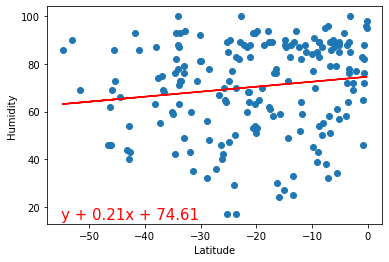

In [25]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

Similar to humidity in the Northern Hemisphere, we also see a pretty flat line in the Southern Hemisphere.  Showing again little change in humidty as we go from the Southern Hemisphere up to the equator. 

Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression

The r-squared is 0.07337054296408824


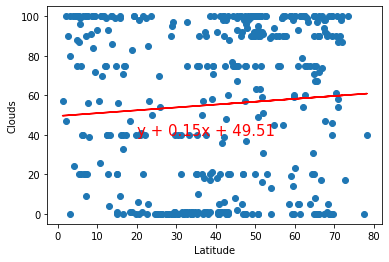

In [26]:
xlbl = "Latitude"
ylbl = "Clouds"
lblpos = (20,40)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,9)

In the Northern Hemisphere's cloud coverage we see a pretty flat line.  There is not a consisten flow of cloud coverage from the equator to the Northern Hemisphere.  We see spreading out all throughout the graph. 

Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression

The r-squared is 0.08373680719377641


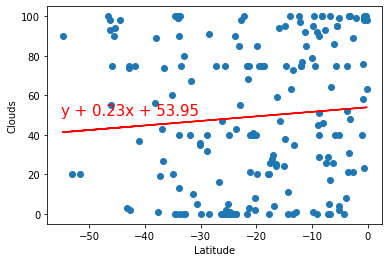

In [27]:
xlbl = "Latitude"
ylbl = "Clouds"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,9)

For the Southern Hemisphere we do see a postive correlation in cloud coverage in general as we go from the Southern Hemisphere to the equator.  Similar though to Northern Hemisphere there is not a specific flow to how much cloud coverage. 

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.17498290886281018


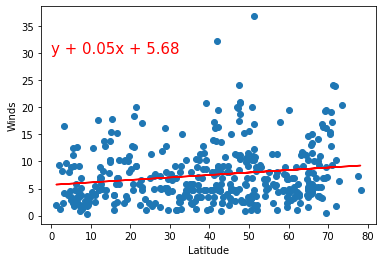

In [29]:
xlbl = "Latitude"
ylbl = "Winds"
lblpos = (0,30)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,11)

For wind speed in the Northern Hemisphere we see consistentcy going across all latitudes with minimul wind speeds throughtout.  

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.23970847168459636


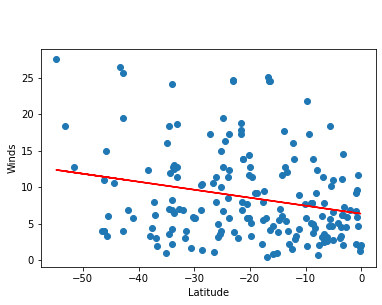

In [30]:
xlbl = "Latitude"
ylbl = "Winds"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)

Unlike the Northern Hemisphere we do see a slight negative correlation in thr Southern Hemisphere wind speeds as we get closer to the equator.  Similar to the Northern Hemisphere we do see very low wind speeds. 